# 5.1 일반화: 머신 러닝의 목표

In [1]:
from tensorflow.keras.datasets import mnist ## MNIST dataset 사용
import numpy as np

(train_images, train_labels),_ = mnist.load_data() ## MNISt dataset 로드
train_images = train_images.reshape((60000, 28*28)) ## 이미지 포맷 변환
train_images = train_images.astype('float32')/255 ## 이미지 정규화
## 결과로 연결된 배열은 원래 train_images와 동일한 수의 행을 갖지만 각 행에는 무작위로 생성된 기능에 해당하는 784개의 열이 추가됨
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images),784))], axis=1) ## 기존 784차원에 백색 노이즈 추가
## 결과로 연결된 배열은 원래 train_images와 동일한 수의 행을 갖지만 각 행에는 0애 해당하는 784개의 열이 추가됨
train_images_with_zeros_channels = np.concatenate([train_images, np.zeros((len(train_images),784))], axis=1) ## 기존 784차원에 0 추가

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(): ## 모델 생성 함수
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [3]:
model = get_model() ## 모델 생성
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2) ## 모델 학습

model = get_model() ## 모델 생성
history_zeros = model.fit(train_images_with_zeros_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2) ## 모델 학습

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6995 - loss: 1.0534 - val_accuracy: 0.9250 - val_loss: 0.2515
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9148 - loss: 0.2765 - val_accuracy: 0.9449 - val_loss: 0.1843
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9444 - loss: 0.1778 - val_accuracy: 0.9557 - val_loss: 0.1543
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9619 - loss: 0.1205 - val_accuracy: 0.9580 - val_loss: 0.1405
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9725 - loss: 0.0867 - val_accuracy: 0.9431 - val_loss: 0.1917
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9797 - loss: 0.0631 - val_accuracy: 0.9601 - val_loss: 0.1321
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9866 - loss: 0.0438 - val_accuracy: 0.9691 - val_loss: 0.1111
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9899 - loss: 0.0344 - val_accuracy: 0.

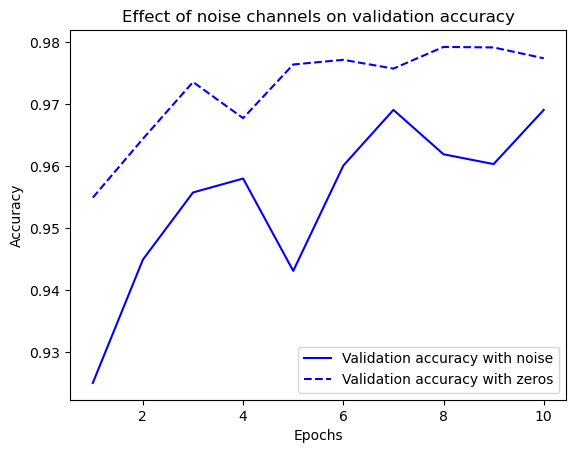

In [4]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-', label='Validation accuracy with noise')
plt.plot(epochs, val_acc_zeros, 'b--', label='Validation accuracy with zeros')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
(train_images, train_labels),_ = mnist.load_data() ## MNISt dataset 로드
train_images = train_images.reshape((60000, 28*28)) ## 이미지 포맷 변환
train_images = train_images.astype('float32')/255 ## 이미지 정규화

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels) ## 레이블 무작위 섞기

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(train_images, random_train_labels, epochs=10, batch_size=128, validation_split=0.2) ## 모델 학습

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1045 - loss: 2.3300 - val_accuracy: 0.1130 - val_loss: 2.3044
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1185 - loss: 2.2972 - val_accuracy: 0.1085 - val_loss: 2.3082
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1284 - loss: 2.2897 - val_accuracy: 0.1068 - val_loss: 2.3175
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1431 - loss: 2.2757 - val_accuracy: 0.0999 - val_loss: 2.3257
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1533 - loss: 2.2592 - val_accuracy: 0.1024 - val_loss: 2.3355
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1703 - loss: 2.2385 - val_accuracy: 0.1012 - val_loss: 2.3422
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1843 - loss: 2.2145 - val_accuracy: 0.1018 - val_loss: 2.3652
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2016 - loss: 2.1861 - val_accuracy: 0.

# 5.2 머신 러닝 모델 평가

In [ ]:
## 홀드아웃 검증 구현
num_validation_samples = 10000
data = np.random.random((num_validation_samples, 784)) ## 무작위 데이터 생성
np.random.shuffle(data) ## 일반적으로 데이터를 섞는 것(shuffling)이 좋음
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]
model = get_model()
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...)
...
model = get_model()
model.fit(np.concatenate([training_data, validation_data]), ...)
test_score = model.evaluate(test_data, ...)

In [ ]:
k = 3
num_validation_samples = len(train_images) // k
np.random.shuffle(data)
validation_scores = []

for fold in range(k):
    ## 검증 데이터 부분을 선택
    validation_data = train_images[num_validation_samples * fold:
                                   num_validation_samples * (fold + 1)]
    
    training_data = np.concatenate(
        [train_images[:num_validation_samples * fold],
         train_images[num_validation_samples * (fold + 1):]])
    
    ## 훈련되지 않은 새로운 모델 생성
    model = get_model()

    model.fit(training_data, ...)
    validation_score = model.evaluate(validation_data, ...)
    validation_scores.append(validation_score)

    ## 검증 점수: k개 폴드의 검증 점수 평균
    validation_score = np.average(validation_scores)

## 테스트 데이터를 제외한 모든 데이터로 모델을 다시 학습
model = get_model()
model.fit(data, ...)
test_score = model.evaluate(test_data, ...)

# 5.3 훈련 성능 향상하기

In [4]:
## 잚ㅅ된 높은 학습률로 MNIST 모델 훈련
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1.),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4206 - loss: 2932.1543 - val_accuracy: 0.2560 - val_loss: 2.4211
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2061 - loss: 3.1159 - val_accuracy: 0.2151 - val_loss: 2.2432
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2212 - loss: 2.8239 - val_accuracy: 0.2482 - val_loss: 3.0820
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2298 - loss: 2.4346 - val_accuracy: 0.1112 - val_loss: 2.4620
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1699 - loss: 2.4805 - val_accuracy: 0.2439 - val_loss: 2.3116
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1781 - loss: 2.4884 - val_accuracy: 0.1601 - val_loss: 2.2526
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1531 - loss: 2.3817 - val_accuracy: 0.1833 - val_loss: 2.1925
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1938 - loss: 2.3177 - val_accuracy:

In [5]:
## 같은 모델을 적절한 학습률로 련
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-2),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8395 - loss: 0.8555 - val_accuracy: 0.9585 - val_loss: 0.1426
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.1179 - val_accuracy: 0.9634 - val_loss: 0.1443
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0890 - val_accuracy: 0.9641 - val_loss: 0.1613
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9790 - loss: 0.0763 - val_accuracy: 0.9682 - val_loss: 0.1701
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9830 - loss: 0.0602 - val_accuracy: 0.9708 - val_loss: 0.1576
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9866 - loss: 0.0517 - val_accuracy: 0.9728 - val_loss: 0.1748
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0473 - val_accuracy: 0.9743 - val_loss: 0.1780
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9903 - loss: 0.0419 - val_accuracy: 0.

In [7]:
## MNIST 데이터를 사용한 간단한 로지스틱 회귀 모댈
model = keras.Sequential([
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history_small_model = model.fit(train_images,train_labels,
                                epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.7413 - loss: 1.0176 - val_accuracy: 0.9034 - val_loss: 0.3604
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.8996 - loss: 0.3679 - val_accuracy: 0.9137 - val_loss: 0.3109
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.9113 - loss: 0.3200 - val_accuracy: 0.9181 - val_loss: 0.2938
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.9172 - loss: 0.3012 - val_accuracy: 0.9208 - val_loss: 0.2846
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.9170 - loss: 0.2949 - val_accuracy: 0.9210 - val_loss: 0.2806
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.9199 - loss: 0.2870 - val_accuracy: 0.9238 - val_loss: 0.2754
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.9251 - loss: 0.2735 - val_accuracy: 0.9262 - val_loss: 0.2713
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.9215 - loss: 0.2790 - 

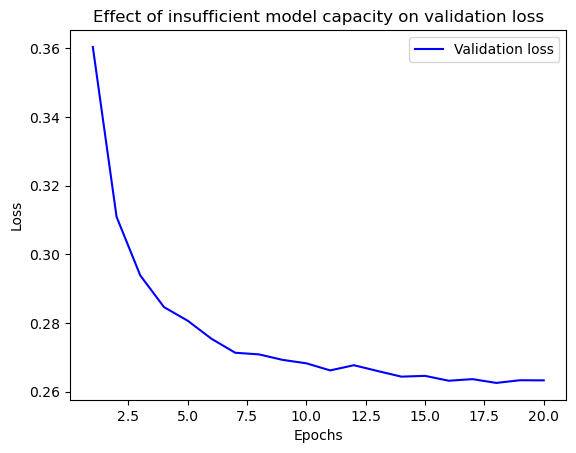

In [8]:
## 손실 그래프 그리기
import matplotlib.pyplot as plt

val_loss = history_small_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
## 96개의 유닛을 가진 2개의 중간픙으로 구성되어 용량이 더 큰 모델을 훈련
model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history_large_model = model.fit(train_images, train_labels,
                                epochs=20, batch_size=128,
                                validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8202 - loss: 0.6279 - val_accuracy: 0.9469 - val_loss: 0.1876
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9454 - loss: 0.1878 - val_accuracy: 0.9606 - val_loss: 0.1361
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9669 - loss: 0.1153 - val_accuracy: 0.9662 - val_loss: 0.1133
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9724 - loss: 0.0913 - val_accuracy: 0.9700 - val_loss: 0.1060
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9793 - loss: 0.0724 - val_accuracy: 0.9703 - val_loss: 0.1000
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9835 - loss: 0.0562 - val_accuracy: 0.9708 - val_loss: 0.0955
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9861 - loss: 0.0460 - val_accuracy: 0.9723 - val_loss: 0.0960
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9885 - loss: 0.0386 - val_accuracy: 0.

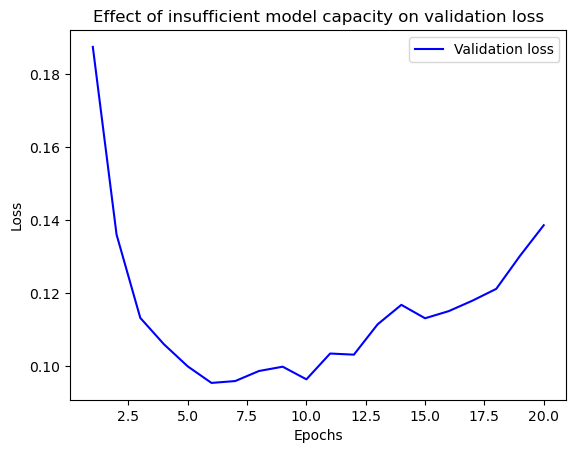

In [11]:
## 손실 그래프 그리기
import matplotlib.pyplot as plt

val_loss = history_large_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()                                      

# 5.4 일반화 성능 향상하기

In [13]:
## 원본 모델
import numpy as np
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) ## IMDB 데이터셋 로드

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [14]:
## 모델 규제
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history_original = model.fit(train_data, train_labels,
                            epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6951 - loss: 0.6039 - val_accuracy: 0.8682 - val_loss: 0.3990
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8928 - loss: 0.3473 - val_accuracy: 0.8806 - val_loss: 0.3194
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9182 - loss: 0.2513 - val_accuracy: 0.8837 - val_loss: 0.2949
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9343 - loss: 0.2043 - val_accuracy: 0.8845 - val_loss: 0.2814
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9477 - loss: 0.1656 - val_accuracy: 0.8897 - val_loss: 0.2752
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9561 - loss: 0.1397 - val_accuracy: 0.8814 - val_loss: 0.2960
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9618 - loss: 0.1265 - val_accuracy: 0.8860 - val_loss: 0.2944
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9671 - loss: 0.1109 - val_accuracy: 0.8845 - val_lo

In [15]:
## 더 작은 모델
model = keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history_smaller = model.fit(train_data, train_labels,
                            epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6821 - loss: 0.6638 - val_accuracy: 0.8427 - val_loss: 0.5798
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8543 - loss: 0.5508 - val_accuracy: 0.8488 - val_loss: 0.4956
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8747 - loss: 0.4640 - val_accuracy: 0.8676 - val_loss: 0.4282
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8877 - loss: 0.3941 - val_accuracy: 0.8744 - val_loss: 0.3793
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9019 - loss: 0.3388 - val_accuracy: 0.8793 - val_loss: 0.3435
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9116 - loss: 0.2942 - val_accuracy: 0.8836 - val_loss: 0.3178
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9186 - loss: 0.2620 - val_accuracy: 0.8865 - val_loss: 0.2995
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9275 - loss: 0.2355 - val_accuracy: 0.8870 - val_loss

In [16]:
## 더 큰 모델
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history_larger = model.fit(train_data, train_labels,
                            epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.6486 - loss: 0.6491 - val_accuracy: 0.7185 - val_loss: 0.5495
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8476 - loss: 0.3568 - val_accuracy: 0.8764 - val_loss: 0.2950
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9019 - loss: 0.2415 - val_accuracy: 0.8363 - val_loss: 0.3881
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9254 - loss: 0.1891 - val_accuracy: 0.8841 - val_loss: 0.2851
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9552 - loss: 0.1231 - val_accuracy: 0.8904 - val_loss: 0.2809
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9640 - loss: 0.1059 - val_accuracy: 0.8564 - val_loss: 0.4051
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9650 - loss: 0.0938 - val_accuracy: 0.8849 - val_loss: 0.3230
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9911 - loss: 0.0373 - val_accuracy: 0.8842 - v

In [17]:
## 모델에 L2 가중치 규제 추가
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history_l2 = model.fit(train_data, train_labels,
                        epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6999 - loss: 0.6912 - val_accuracy: 0.8651 - val_loss: 0.4799
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8812 - loss: 0.4357 - val_accuracy: 0.8476 - val_loss: 0.4419
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9104 - loss: 0.3433 - val_accuracy: 0.8817 - val_loss: 0.3784
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9261 - loss: 0.3005 - val_accuracy: 0.8866 - val_loss: 0.3599
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9394 - loss: 0.2712 - val_accuracy: 0.8823 - val_loss: 0.3683
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9345 - loss: 0.2682 - val_accuracy: 0.8738 - val_loss: 0.3895
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9415 - loss: 0.2579 - val_accuracy: 0.8836 - val_loss: 0.3690
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9538 - loss: 0.2331 - val_accuracy: 0.8830 - val_l

In [18]:
## 케라스에서 사용할 수 있는 가중치 규제
from tensorflow.keras import regularizers

regularizers.l1(0.001) ## L1 규제
regularizers.l1_l2(l1=0.001, l2=0.001) ## L1과 L2 규제 병행

In [ ]:
## IMDB에 드롭아웃 추가하기
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history_dropout = model.fit(train_data, train_labels,
                            epochs=20, batch_size=512, validation_split=0.4)